# Overview
- とりあえずデータを眺めてみる。  
- **ディレクトリツリー**  
```
.
├── example_test_audio
    ├── BLKFR-10-CPL_20190611_093000.pt540.mp3
    └── ORANGE-7-CAP_20190606_093000.pt623.mp3
├── example_test_audio_metadata.csv
├── example_test_audio_summary.csv
├── sample_submission.csv
├── test.csv
├── train.csv
└── train_audio
    ├── aldfly
    ├── ameavo
    ├── amebit
    ...
```

# Const

In [1]:
DIR_DATA = '../data_ignore/official'
PATH_TEST_CSV = f'{DIR_DATA}/test.csv'
PATH_TRAIN_CSV = f'{DIR_DATA}/train.csv'

# Import everything I need :)

In [23]:
from scipy.io import wavfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa

# My function

# Preparation

<br>

setting

In [3]:
pd.set_option('display.max_columns', 100)

# EDA

## train.csv

In [4]:
df_train = pd.read_csv(PATH_TRAIN_CSV)

In [5]:
df_train.head(7)

,rating,playback_used,ebird_code,channels,date,pitch,duration,filename,speed,species,number_of_notes,title,secondary_labels,bird_seen,sci_name,location,latitude,sampling_rate,type,elevation,description,bitrate_of_mp3,file_type,volume,background,xc_id,url,country,author,primary_label,longitude,length,time,recordist,license
0,3.5,no,aldfly,1 (mono),2013-05-25,Not specified,25,XC134874.mp3,Not specified,Alder Flycatcher,Not specified,XC134874 Alder Flycatcher (Empidonax alnorum),"['Empidonax minimus_Least Flycatcher', 'Leioth...",yes,Empidonax alnorum,"Grey Cloud Dunes SNA, Washington, Minnesota",44.793,48000 (Hz),call,220 m,Two short segments of fairly quiet *pip* calls...,192000 (bps),mp3,Not specified,American Yellow Warbler (Setophaga aestiva); L...,134874,https://www.xeno-canto.org/134874,United States,Jonathon Jongsma,Empidonax alnorum_Alder Flycatcher,-92.962,Not specified,8:00,Jonathon Jongsma,Creative Commons Attribution-ShareAlike 3.0
1,4.0,no,aldfly,2 (stereo),2013-05-27,both,36,XC135454.mp3,both,Alder Flycatcher,1-3,XC135454 Alder Flycatcher (Empidonax alnorum),[],yes,Empidonax alnorum,"Carver's Gap Parking area, Roan Mountain Stat...",36.1065,44100 (Hz),"call, song",1700 m,At least three birds seen here moving around s...,128000 (bps),mp3,level,NaN,135454,https://www.xeno-canto.org/135454,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...
2,4.0,no,aldfly,2 (stereo),2013-05-27,both,39,XC135455.mp3,both,Alder Flycatcher,1-3,XC135455 Alder Flycatcher (Empidonax alnorum),[],yes,Empidonax alnorum,"Carver's Gap Parking area, Roan Mountain Stat...",36.1065,44100 (Hz),"call, song",1700 m,At least three birds seen chasing each other a...,128000 (bps),mp3,level,NaN,135455,https://www.xeno-canto.org/135455,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...
3,3.5,no,aldfly,2 (stereo),2013-05-27,both,33,XC135456.mp3,both,Alder Flycatcher,1-3,XC135456 Alder Flycatcher (Empidonax alnorum),"['Dumetella carolinensis_Gray Catbird', 'Bomby...",yes,Empidonax alnorum,"Carver's Gap Parking area, Roan Mountain Stat...",36.1065,44100 (Hz),"call, song",1700 m,img:http://www.flickr.com/photos/madbirder/888...,128000 (bps),mp3,level,Grey Catbird (Dumetella carolinensis); Cedar W...,135456,https://www.xeno-canto.org/135456,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...
4,4.0,no,aldfly,2 (stereo),2013-05-27,both,36,XC135457.mp3,level,Alder Flycatcher,1-3,XC135457 Alder Flycatcher (Empidonax alnorum),[],yes,Empidonax alnorum,"Carver's Gap Parking area, Roan Mountain Stat...",36.1065,44100 (Hz),"call, song",1700 m,img:http://www.flickr.com/photos/madbirder/888...,128000 (bps),mp3,level,NaN,135457,https://www.xeno-canto.org/135457,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,0-3(s),08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...
5,4.0,no,aldfly,2 (stereo),2013-05-27,Not specified,7,XC135459.mp3,Not specified,Alder Flycatcher,Not specified,XC135459 Alder Flycatcher (Empidonax alnorum),[],yes,Empidonax alnorum,"Carver's Gap Parking area, Roan Mountain Stat...",36.1065,44100 (Hz),"call, song",1700 m,img:http://www.flickr.com/photos/madbirder/888...,128000 (bps),mp3,Not specified,NaN,135459,https://www.xeno-canto.org/135459,United States,Mike Nelson,Empidonax alnorum_Alder Flycatcher,-82.1106,Not specified,08:30,Mike Nelson,Creative Commons Attribution-NonCommercial-Sha...
6,4.0,no,aldfly,2 (stereo),2013-05-27,Not specified,45,XC135460.mp3,Not specified,Alder Flycatcher,Not specified,XC135460 Alder Flycatcher (Empidonax alnorum),[],yes,Empidonax alnorum,"Carver's Gap Parking area, Roan Mountain Stat...",36.1065,44100 (Hz),"call, song",1700 m,img:http://www.flickr.com/photos/madbirder/888...,128000 (bps),mp3,Not specified,NaN,13

---> ↓こいつらよくわからん。  
  rating, playback_used, pitch, duration, speed, species, number_of_notes, secondary_labels, bird_seen, sci_name, latitude, elevation, bitrate_of_mp3, volume, background, xc_id, primary_label, longitude, length, time    

In [8]:
df_train.describe()

,rating,duration,xc_id
count,21375.000000,21375.000000,21375.000000
mean,4.068047,55.806784,285004.752140
std,0.988122,76.385696,125160.991016
min,0.000000,0.000000,1634.000000
25%,3.500000,15.000000,174094.500000
50%,4.000000,33.000000,293438.000000
75%,5.000000,68.000000,386885.500000
max,5.000000,2283.000000,505611.000000


---> 20,000 件のwavファイルがあると。  

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21375 entries, 0 to 21374
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rating            21375 non-null  float64
 1   playback_used     19575 non-null  object 
 2   ebird_code        21375 non-null  object 
 3   channels          21375 non-null  object 
 4   date              21375 non-null  object 
 5   pitch             21375 non-null  object 
 6   duration          21375 non-null  int64  
 7   filename          21375 non-null  object 
 8   speed             21375 non-null  object 
 9   species           21375 non-null  object 
 10  number_of_notes   21375 non-null  object 
 11  title             21375 non-null  object 
 12  secondary_labels  21375 non-null  object 
 13  bird_seen         19575 non-null  object 
 14  sci_name          21375 non-null  object 
 15  location          21375 non-null  object 
 16  latitude          21375 non-null  object

In [20]:
df_train.isnull().sum(axis=0)

rating                  0
playback_used        1800
ebird_code              0
channels                0
date                    0
pitch                   0
duration                0
filename                0
speed                   0
species                 0
number_of_notes         0
title                   0
secondary_labels        0
bird_seen            1800
sci_name                0
location                0
latitude                0
sampling_rate           0
type                    0
elevation               0
description          6199
bitrate_of_mp3          8
file_type               0
volume                  0
background          13075
xc_id                   0
url                     0
country                 0
author                  0
primary_label           0
longitude               0
length                  0
time                    0
recordist               0
license                 0
dtype: int64

---> playback_used と bird_seen のnull数が一致してる。

In [6]:
df_train.describe()

,rating,duration,xc_id
count,21375.000000,21375.000000,21375.000000
mean,4.068047,55.806784,285004.752140
std,0.988122,76.385696,125160.991016
min,0.000000,0.000000,1634.000000
25%,3.500000,15.000000,174094.500000
50%,4.000000,33.000000,293438.000000
75%,5.000000,68.000000,386885.500000
max,5.000000,2283.000000,505611.000000


---

<br>

rating とは？

In [16]:
df_train['rating'].value_counts()

5.0    6105
4.0    5251
4.5    4114
3.5    3223
3.0    1097
2.5     637
0.0     487
2.0     241
1.5     130
1.0      53
0.5      37
Name: rating, dtype: int64

[このサイト](https://www.xeno-canto.org/134874)の説明によると、録音の質を示すらしい。  
低いものは抜いた方がいい？

<br>  

ebird_code とは？

In [52]:
df_train['ebird_code'].nunique()

264

<br>

channels とは？

In [54]:
df_train['channels'].unique()

array(['1 (mono)', '2 (stereo)'], dtype=object)

<br>

date とは？

In [59]:
df_train['date'].unique()

array(['2013-05-25', '2013-05-27', '2013-05-30', ..., '2009-05-07',
       '2019-01-04', '2019-09-25'], dtype=object)

<br>

pitch とは？

In [61]:
df_train['pitch'].nunique()

5

In [60]:
df_train['pitch'].unique()

array(['Not specified', 'both', 'increasing', 'level', 'decreasing'],
      dtype=object)

In [63]:
df_train['pitch'].value_counts()

Not specified    15155
level             3149
both              2077
decreasing         528
increasing         466
Name: pitch, dtype: int64

---> ↑の5種類。both, increasing, level, decreasing をそれぞれ聞いてみる(spectrogram_tree)

In [88]:
mask = df_train['pitch'] == 'increasing'
df_train[mask][['ebird_code', 'filename', 'pitch']].iloc[0:5]

,ebird_code,filename,pitch
7,aldfly,XC135883.mp3,increasing
25,aldfly,XC16967.mp3,increasing
72,aldfly,XC31060.mp3,increasing
73,aldfly,XC317112.mp3,increasing
77,aldfly,XC319017.mp3,increasing


In [90]:
mask = df_train['pitch'] == 'decreasing'
df_train[mask][['ebird_code', 'filename', 'pitch']].iloc[0:5]

,ebird_code,filename,pitch
175,amebit,XC417855.mp3,decreasing
201,amecro,XC131445.mp3,decreasing
202,amecro,XC131447.mp3,decreasing
440,amekes,XC466164.mp3,decreasing
471,amepip,XC157677.mp3,decreasing


In [91]:
mask = df_train['pitch'] == 'both'
df_train[mask][['ebird_code', 'filename', 'pitch']].iloc[0:5]

,ebird_code,filename,pitch
1,aldfly,XC135454.mp3,both
2,aldfly,XC135455.mp3,both
3,aldfly,XC135456.mp3,both
4,aldfly,XC135457.mp3,both
8,aldfly,XC137570.mp3,both


In [92]:
mask = df_train['pitch'] == 'level'
df_train[mask][['ebird_code', 'filename', 'pitch']].iloc[0:5]

,ebird_code,filename,pitch
21,aldfly,XC154449.mp3,level
34,aldfly,XC188377.mp3,level
35,aldfly,XC188432.mp3,level
36,aldfly,XC188434.mp3,level
37,aldfly,XC188813.mp3,level


---> 聞いてみたけど、よくわからなかったな。

<br>

dulation とは

In [96]:
df_train['duration'].nunique()

495

In [12]:
df_train.sort_values('duration').head(5)

,rating,playback_used,ebird_code,channels,date,pitch,duration,filename,speed,species,number_of_notes,title,secondary_labels,bird_seen,sci_name,location,latitude,sampling_rate,type,elevation,description,bitrate_of_mp3,file_type,volume,background,xc_id,url,country,author,primary_label,longitude,length,time,recordist,license
13789,5.0,no,norwat,1 (mono),2019-09-24,level,0,XC499319.mp3,level,Northern Waterthrush,1-3,XC499319 Northern Waterthrush (Parkesia novebo...,[],yes,Parkesia noveboracensis,"Topolobampo, Ahome, Sinaloa",25.6036,44100 (Hz),"alarm call, call, flight call",40 m,Recforge en Moto g5 plus,320000 (bps),mp3,level,NaN,499319,https://www.xeno-canto.org/499319,Mexico,Isain Contreras Rodríguez,Parkesia noveboracensis_Northern Waterthrush,-109.0521,0-3(s),07:00,Isain Contreras Rodríguez,Creative Commons Attribution-NonCommercial-Sha...
20706,4.0,no,woothr,2 (stereo),2015-09-11,level,0,XC278996.mp3,level,Wood Thrush,1-3,XC278996 Wood Thrush (Hylocichla mustelina),[],no,Hylocichla mustelina,"Ithaca, Tompkins County, New York",42.4441,44100 (Hz),"Nocturnal Flight Call, flight call",260 m,NFC of Wood Thrush on a good migration night.,192000 (bps),mp3,level,NaN,278996,https://www.xeno-canto.org/278996,United States,Gates Dupont,Hylocichla mustelina_Wood Thrush,-76.4786,0-3(s),23:30,Gates Dupont,Creative Commons Attribution-NonCommercial-Sha...
2637,4.0,no,blugrb1,2 (stereo),2014-04-28,Not specified,0,XC177352.mp3,Not specified,Blue Grosbeak,Not specified,XC177352 Blue Grosbeak (Passerina caerulea),[],yes,Passerina caerulea,"Bill Williams River NWR, Arizona",34.285,48000 (Hz),flight call,150 m,"Single ""bzzt"" call. Both members of a pair wer...",128000 (bps),mp3,Not specified,NaN,177352,https://www.xeno-canto.org/177352,United States,Lauren Harter,Passerina caerulea_Blue Grosbeak,-114.069,Not specified,07:50,Lauren Harter,Creative Commons Attribution-NonCommercial-Sha...
6646,4.5,no,comter,2 (stereo),2016-05-12,Not specified,0,XC316063.mp3,Not specified,Common Tern,Not specified,XC316063 Common Tern (Sterna hirundo),['Acrocephalus arundinaceus_Great Reed Warbler'],yes,Sterna hirundo,"Dahme-Spreewald (Wolziger See), Brandenburg",52.2678,44100 (Hz),call,30 m,NaN,263103 (bps),mp3,Not specified,Great Reed Warbler (Acrocephalus arundinaceus),316063,https://www.xeno-canto.org/316063,Germany,Sonnenburg,Sterna hirundo_Common Tern,13.829,Not specified,07:25,Sonnenburg,Creative Commons Attribution-NonCommercial-Sha...
8215,3.0,no,fiespa,1 (mono),2016-04-21,Not specified,0,XC313356.mp3,Not specified,Field Sparrow,Not specified,XC313356 Field Sparrow (Spizella pusilla),[],yes,Spizella pusilla,"Elsen's Hill, DuPage County, Illinois",41.8605,44100 (Hz),flight call,240 m,NaN,320000 (bps),mp3,Not specified,NaN,313356,https://www.xeno-canto.org/313356,United States,Matt Wistrand,Spizella pusilla_Field Sparrow,-88.1756,Not specified,06:46,Matt Wistrand,Creative Commons Attribution-NonCommercial-Sha...


---> 0秒はないだろうから最初のひとつだけ見てみよう。

In [18]:
val = df_train.sort_values('duration')[['ebird_code', 'filename', 'duration']].iloc[0, :].values
print(val)

['norwat' 'XC499319.mp3' 0]


In [21]:
path = f'./../data_ignore/official/train_audio/{val[0]}/{val[1]}'
print(path)

./../data_ignore/official/train_audio/norwat/XC499319.mp3


In [25]:
signal, sr = librosa.load(path)
print(f'recording time (sec): {len(signal)/sr:.3f}')

/home/user/.local/lib/python3.6/site-packages/librosa/core/audio.py:161: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn('PySoundFile failed. Trying audioread instead.')


recording time (sec): 0.865


<br>

filename とは

In [102]:
df_train['filename'].nunique(), len(df_train)

(21375, 21375)

---> filename にかぶりなし

<br>

speed

In [103]:
df_train['speed'].value_counts()

Not specified    15046
level             5079
both               782
accelerating       326
decelerating       142
Name: speed, dtype: int64

--> ↑それぞれを聞いてみる

In [106]:
mask = df_train['speed'] == 'accelerating'
df_train[mask][['ebird_code', 'filename', 'speed']].iloc[0:5]

,ebird_code,filename,speed
8,aldfly,XC137570.mp3,accelerating
34,aldfly,XC188377.mp3,accelerating
158,amebit,XC310044.mp3,accelerating
159,amebit,XC310045.mp3,accelerating
176,amebit,XC417863.mp3,accelerating


In [107]:
mask = df_train['speed'] == 'decelerating'
df_train[mask][['ebird_code', 'filename', 'speed']].iloc[0:5]

,ebird_code,filename,speed
73,aldfly,XC317112.mp3,decelerating
471,amepip,XC157677.mp3,decelerating
472,amepip,XC157890.mp3,decelerating
570,amered,XC139439.mp3,decelerating
1065,astfly,XC122820.mp3,decelerating


In [108]:
mask = df_train['speed'] == 'both'
df_train[mask][['ebird_code', 'filename', 'speed']].iloc[0:5]

,ebird_code,filename,speed
1,aldfly,XC135454.mp3,both
2,aldfly,XC135455.mp3,both
3,aldfly,XC135456.mp3,both
51,aldfly,XC189590.mp3,both
74,aldfly,XC317903.mp3,both


In [109]:
mask = df_train['speed'] == 'level'
df_train[mask][['ebird_code', 'filename', 'speed']].iloc[0:5]

,ebird_code,filename,speed
4,aldfly,XC135457.mp3,level
7,aldfly,XC135883.mp3,level
11,aldfly,XC140298.mp3,level
21,aldfly,XC154449.mp3,level
25,aldfly,XC16967.mp3,level


<br>

species とは

In [112]:
df_train['species'].nunique()

264

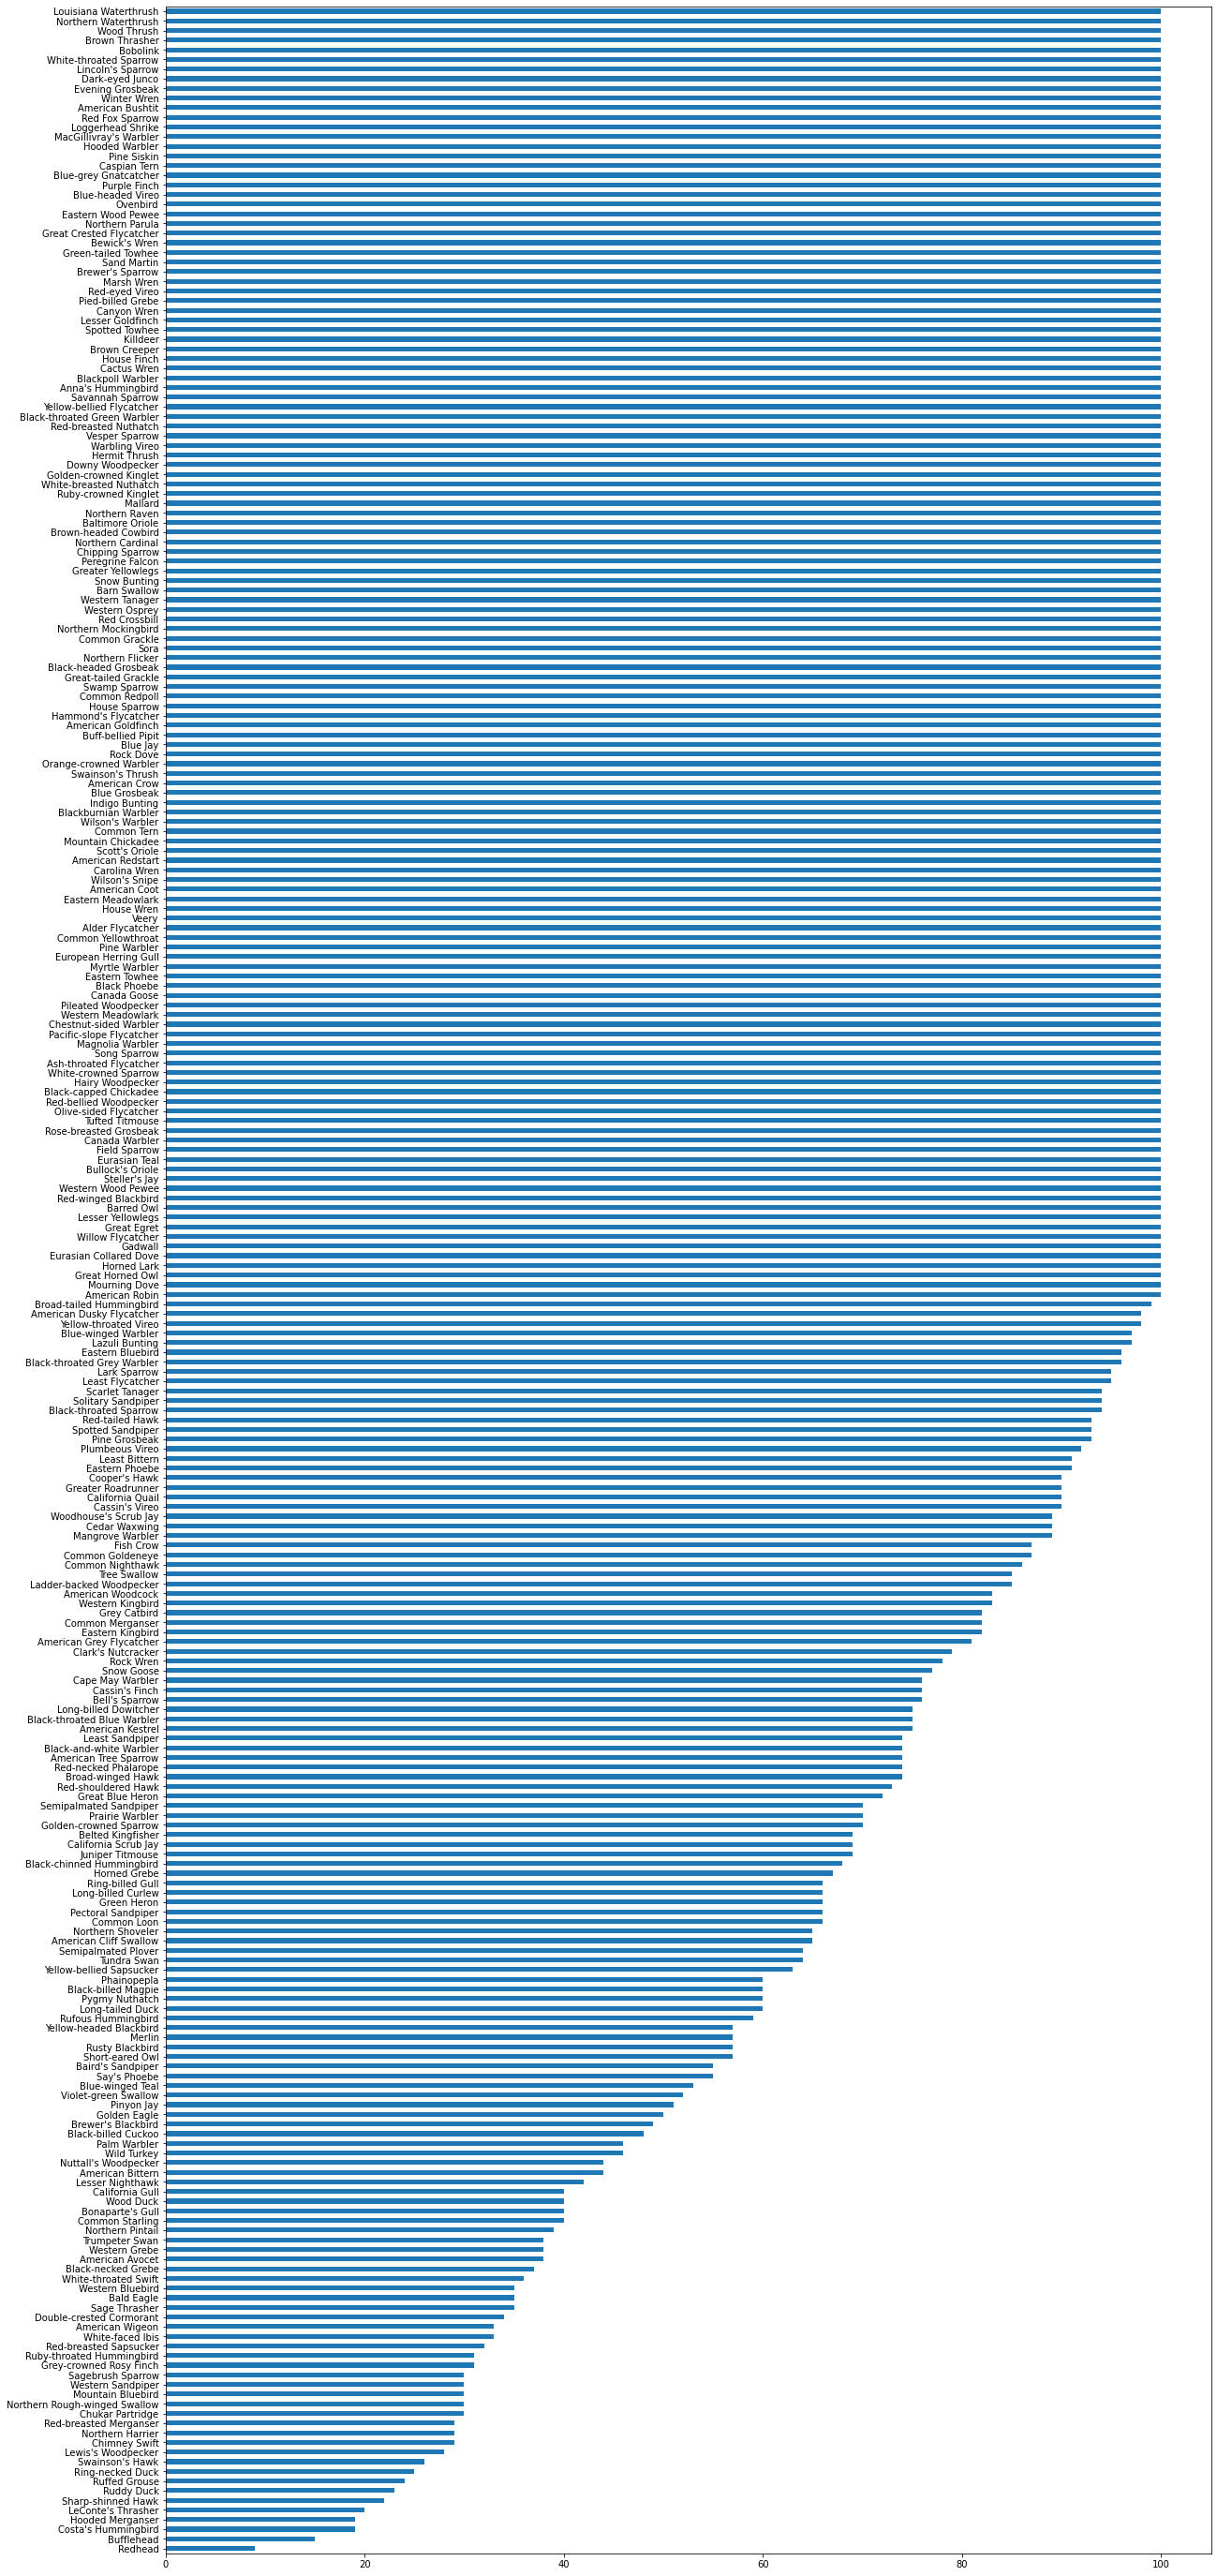

In [131]:
plt.figure(figsize=(20, 50))
df_train['species'].value_counts(ascending=True).plot(kind='barh')
# a = df_train['species'].value_counts()

---> うーん。全然わからん。

<br>

number_of_notes とは

In [135]:
df_train['number_of_notes'].unique()

array(['Not specified', '1-3', '4-6', '7-20', '>20'], dtype=object)

<br>

title とは

In [139]:
df_train['title'].nunique(),  len(df_train)

(21375, 21375)

In [165]:
df_train[['ebird_code', 'title']][:2000:100]

,ebird_code,title
0,aldfly,XC134874 Alder Flycatcher (Empidonax alnorum)
100,ameavo,XC133080 American Avocet (Recurvirostra americ...
200,amecro,XC126022 American Crow (Corvus brachyrhynchos)
300,amegfi,XC169080 American Goldfinch (Spinus tristis)
400,amekes,XC254588 American Kestrel (Falco sparverius)
500,amepip,XC277562 Buff-bellied Pipit (Anthus rubescens)
600,amered,XC193769 American Redstart (Setophaga ruticilla)
700,amerob,XC309636 American Robin (Turdus migratorius)
800,amewoo,XC171994 American Woodcock (Scolopax minor)
900,amtspa,XC177226 American Tree Sparrow (Spizelloides a...


<br>

secondaly_labels とは

In [168]:
df_train['secondary_labels'].nunique()

5385

In [176]:
df_train['secondary_labels'][:20]

0     ['Empidonax minimus_Least Flycatcher', 'Leioth...
1                                                    []
2                                                    []
3     ['Dumetella carolinensis_Gray Catbird', 'Bomby...
4                                                    []
5                                                    []
6                                                    []
7     ['Geothlypis trichas_Common Yellowthroat', 'Du...
8                                                    []
9     ['Setophaga virens_Black-throated Green Warble...
10    ['Geothlypis trichas_Common Yellowthroat', 'Co...
11    ['Parkesia noveboracensis_Northern Waterthrush...
12                                                   []
13                                                   []
14                                                   []
15                                                   []
16                                                   []
17          ['Leiothlypis peregrina_Tennessee Wa

In [177]:
df_train['secondary_labels'].values[0]

"['Empidonax minimus_Least Flycatcher', 'Leiothlypis peregrina_Tennessee Warbler', 'Dumetella carolinensis_Gray Catbird', 'Spizella pusilla_Field Sparrow']"

--> ↓ wavfileのメタデータにそれらしい情報が入ってた。↓を編集して↑にしたのか？  
> also:  American Yellow Warbler, Least Flycatcher, Tennessee Warbler, Grey Catbird, Field Sparrow

<br>

sci_name とは

In [181]:
df_train['sci_name'].nunique(), df_train['ebird_code'].nunique()

(264, 264)

In [188]:
df_train[['ebird_code', 'title', 'sci_name']]

,ebird_code,title,sci_name
0,aldfly,XC134874 Alder Flycatcher (Empidonax alnorum),Empidonax alnorum
1,aldfly,XC135454 Alder Flycatcher (Empidonax alnorum),Empidonax alnorum
2,aldfly,XC135455 Alder Flycatcher (Empidonax alnorum),Empidonax alnorum
3,aldfly,XC135456 Alder Flycatcher (Empidonax alnorum),Empidonax alnorum
4,aldfly,XC135457 Alder Flycatcher (Empidonax alnorum),Empidonax alnorum
...,...,...,...
21370,yetvir,XC477608 Yellow-throated Vireo (Vireo flavifrons),Vireo flavifrons
21371,yetvir,XC500348 Yellow-throated Vireo (Vireo flavifrons),Vireo flavifrons
21372,yetvir,XC501230 Yellow-throated Vireo (Vireo flavifrons),Vireo flavifrons
21373,yetvir,XC54828 Yellow-throated Vireo (Vireo flavifrons),Vireo flavifrons


---> 学名かな

<br>

location とは

In [6]:
df_train['location'].nunique()

6349

In [10]:
df_train['location'].value_counts()[:30]

 Portal, Arizona                                                       360
 Viera Wetlands, Florida                                               152
 River Lakes Conservation Area near Viera, Brevard Co, Florida         125
 Elsen's Hill, DuPage County, Illinois                                 114
 San Bernardino National Wildlife Refuge, Cochise County, Arizona       98
 Tama (near  Burlington), Des Moines, Iowa                              93
 Oxford, Lafayette County, Mississippi                                  89
 Wood Buffalo (near  Fort McMurray), Division No. 16, Alberta           79
 Biolab Road, Canaveral National Seashore, Brevard County, Florida      77
 Lower Moreland (near  Huntingdon Valley), Montgomery, Pennsylvania     77
 Knoxville, Tennessee                                                   73
 Orlando Wetlands, Christmas, Orange County, Florida                    69
 Oak Hammock Trail, Merritt Island NWR, Brevard County, Florida         68
 La Corona Arriba, Sierra

In [11]:
df_train.columns

Index(['rating', 'playback_used', 'ebird_code', 'channels', 'date', 'pitch',
       'duration', 'filename', 'speed', 'species', 'number_of_notes', 'title',
       'secondary_labels', 'bird_seen', 'sci_name', 'location', 'latitude',
       'sampling_rate', 'type', 'elevation', 'description', 'bitrate_of_mp3',
       'file_type', 'volume', 'background', 'xc_id', 'url', 'country',
       'author', 'primary_label', 'longitude', 'length', 'time', 'recordist',
       'license'],
      dtype='object')

<br>

latitude/longitude

緯度/経度

<br>

type とは？

In [22]:
df_train['type'].nunique()

1267

---> 種類多くね？

In [39]:
for t in df_train['type'].unique():
    print(t)

call
call, song
song
alarm call, song
male, song
"weeoo" call
"zweeoo" call
Song
call, chase call
call, complex interaction calls
complex interaction calls
wee-oo or zwee-oo call
dawn song, song
dawn song
zweeoo call
song, zweeoo call
zweeoo
call, male, song
alarm call
call, female, male
call, flight call
Calling to young fledglings, female, male
broken wing display
alarm call, flight call
flight call
clicking, pumping, song
Pump-er-lunk
female, flight call
whisper song
threat calls
alarm call, call
juvenile
begging call
call, flight call, wing noise
call, juvenile
Juvenile Babble, call, juvenile
Caw, call
Caw, call, gurgle, rattle
call, male
call, flight call, song
begging call, juvenile
begging call, flight call
airplanes, automobile traffic, call, song
call, flight call, male
call, female
flight call, song
alarm call, call, flight call
alarm call, begging call, flight call
alarm call, begging call
begging call, call, juvenile
Young calling from the nest
call in flight
calls
female, 

---> 多すぎだと思う...  
---> fight, call, song が多いのかな。

In [40]:
df_train['type'].value_counts()

song                                              6718
call                                              6410
flight call                                       1203
call, song                                        1177
male, song                                         620
                                                  ... 
call, male, song, whisper song                       1
call, interaction calls, rasp, wing whine            1
call, female, flight display, male, wing noise       1
Wing flaps, flight call                              1
male, wing beats                                     1
Name: type, Length: 1267, dtype: int64

<br>

elevation とは

In [17]:
df_train['elevation'].value_counts()[:20]

0 m       2248
10 m      1527
1400 m     651
1500 m     571
1600 m     528
1100 m     514
40 m       509
260 m      471
220 m      450
20 m       446
1700 m     432
1200 m     400
50 m       391
1300 m     388
60 m       375
300 m      372
100 m      367
? m        364
550 m      355
280 m      351
Name: elevation, dtype: int64

<br>

description とは

In [21]:
df_train['description']

0        Two short segments of fairly quiet *pip* calls...
1        At least three birds seen here moving around s...
2        At least three birds seen chasing each other a...
3        img:http://www.flickr.com/photos/madbirder/888...
4        img:http://www.flickr.com/photos/madbirder/888...
                               ...                        
21370                                 Natural vocalization
21371                          Field Number: VA2017 JRS 09
21372    Field Number: VA2017 JRS 24; close and visible...
21373                                                  NaN
21374                                                  NaN
Name: description, Length: 21375, dtype: object

---> audiofileにかかれているメタデータ。

<br>

bitrate_of_mp3

In [24]:
df_train['bitrate_of_mp3'].nunique()

2583

In [27]:
df_train['bitrate_of_mp3'].value_counts()[:20]

128000 (bps)    11589
320000 (bps)     2850
192000 (bps)     2511
256000 (bps)      507
96000 (bps)       392
160000 (bps)      343
80000 (bps)       133
64000 (bps)       100
48000 (bps)        43
224000 (bps)       29
56000 (bps)        14
112000 (bps)        8
128023 (bps)        6
128025 (bps)        6
40000 (bps)         5
128037 (bps)        5
320042 (bps)        5
128024 (bps)        5
128041 (bps)        5
128044 (bps)        5
Name: bitrate_of_mp3, dtype: int64

In [33]:
df_train[['bitrate_of_mp3']].head()

,bitrate_of_mp3
0,192000 (bps)
1,128000 (bps)
2,128000 (bps)
3,128000 (bps)
4,128000 (bps)


In [40]:
bitrate_list = []
for i in range(len(df_train)):
    val = int(df_train['bitrate_of_mp3'].values[i].split(' (bps)')[0])
    bitrate_list.append(val)

AttributeError: 'float' object has no attribute 'split'

,ebird_code,filename,bitrate_of_mp3
0,aldfly,XC134874.mp3,192000 (bps)
1,aldfly,XC135454.mp3,128000 (bps)
2,aldfly,XC135455.mp3,128000 (bps)
3,aldfly,XC135456.mp3,128000 (bps)
4,aldfly,XC135457.mp3,128000 (bps)
5,aldfly,XC135459.mp3,128000 (bps)
6,aldfly,XC135460.mp3,128000 (bps)
7,aldfly,XC135883.mp3,320000 (bps)
8,aldfly,XC137570.mp3,128000 (bps)
9,aldfly,XC138639.mp3,192000 (bps)


In [64]:
df_train[['ebird_code', 'filename']][2:3]

,ebird_code,filename
2,aldfly,XC135455.mp3


In [71]:
for i, val in enumerate(df_train['bitrate_of_mp3'].values):
    if type(val) != str:
        print('-'*50)
        print(type(val))
        display(df_train[['ebird_code', 'filename', 'bitrate_of_mp3']][i:i+1])

--------------------------------------------------
<class 'float'>


,ebird_code,filename,bitrate_of_mp3
711,amerob,XC367008.mp3,NaN


--------------------------------------------------
<class 'float'>


,ebird_code,filename,bitrate_of_mp3
3755,btbwar,XC504005.mp3,NaN


--------------------------------------------------
<class 'float'>


,ebird_code,filename,bitrate_of_mp3
3756,btbwar,XC504006.mp3,NaN


--------------------------------------------------
<class 'float'>


,ebird_code,filename,bitrate_of_mp3
8024,eucdov,XC505275.mp3,NaN


--------------------------------------------------
<class 'float'>


,ebird_code,filename,bitrate_of_mp3
9703,grtgra,XC395021.mp3,NaN


--------------------------------------------------
<class 'float'>


,ebird_code,filename,bitrate_of_mp3
14931,pingro,XC504893.mp3,NaN


--------------------------------------------------
<class 'float'>


,ebird_code,filename,bitrate_of_mp3
14933,pingro,XC505016.mp3,NaN


--------------------------------------------------
<class 'float'>


,ebird_code,filename,bitrate_of_mp3
18884,tunswa,XC505006.mp3,NaN


<br>

file_type とは

In [74]:
df_train['file_type'].value_counts()

mp3    21367
wav        6
mp2        1
aac        1
Name: file_type, dtype: int64

<br>

volume とは

In [76]:
df_train['volume'].value_counts()

Not specified    14886
level             4350
both              1242
increasing         595
decreasing         302
Name: volume, dtype: int64

<br>

background

In [87]:
df_train['background'].value_counts()[:20]

Red-winged Blackbird (Agelaius phoeniceus)         128
Northern Cardinal (Cardinalis cardinalis)           77
American Robin (Turdus migratorius)                 75
House Finch (Haemorhous mexicanus)                  49
Blue Jay (Cyanocitta cristata)                      46
Western Meadowlark (Sturnella neglecta)             45
Red-eyed Vireo (Vireo olivaceus)                    44
American Crow (Corvus brachyrhynchos)               43
Black-capped Chickadee (Poecile atricapillus)       42
Canada Goose (Branta canadensis)                    40
Northern Raven (Corvus corax)                       38
Chipping Sparrow (Spizella passerina)               36
Song Sparrow (Melospiza melodia)                    33
White-throated Sparrow (Zonotrichia albicollis)     31
Common Yellowthroat (Geothlypis trichas)            31
Marsh Wren (Cistothorus palustris)                  31
Spotted Towhee (Pipilo maculatus)                   28
Killdeer (Charadrius vociferus)                     27
House Spar